In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
path = '../input/santander-customer-transaction-prediction/train.csv'
df = pd.read_csv(path)

In [3]:
print("Data has {} rows, {} columns".format(df.shape[0], df.shape[1]))

Data has 200000 rows, 202 columns


In [4]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
print("Data has {} null values".format(df.isnull().any().sum()))

Data has 0 null values


NO NULLS

Distribution of values in the Target column

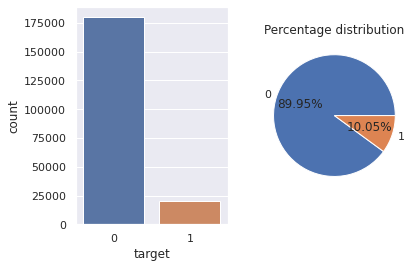

In [6]:
f, ax = plt.subplots(nrows = 1, ncols = 2)
sns.countplot(x = 'target', data = df, ax = ax[0])
ax[1].pie(x = df.target.value_counts().values, labels = df.target.value_counts().index, autopct = "%.2f%%")
ax[1].set_title("Percentage distribution")
plt.show()

### **The data is heavily biased**

### corr_help : A function to find co-relation of features with a given columns

In [7]:
def corr_help(df, col):
    x = []
    for i in range(200):
        corr = df[col].corr(df['var_'+str(i)])
        x.append(corr)
    return x

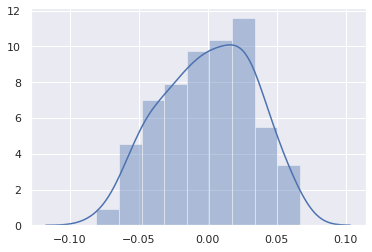

In [8]:
x = corr_help(df, 'target')
sns.distplot(x)
plt.show()

Most of the features show low +ve corelation with the target variable

In [9]:
y = df['target']
df = df.drop(['ID_code', 'target'], axis = 1)

Removing outliers

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR1 = Q3-Q1
df_c = df[~((df < (Q1-1.5*IQR1))|(df > (Q3+1.5*IQR1))).any(axis = 1)]

In [11]:
print('Data loss is {}%'.format(((len(y) - len(df_c))/len(y))*100))

Data loss is 12.447999999999999%


Removing the values in target columns which were related to outliers

In [12]:
c = list(df_c.index)
f = []
for i in range(len(c)-1):
    for j in range(c[i]+1, c[i+1]):
        f.append(j)
for i in f:
    y.pop(i)
y = list(y)
df_c['y'] = y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
data = df_c

Visualising the distribution of values in diff var (selected randomly)

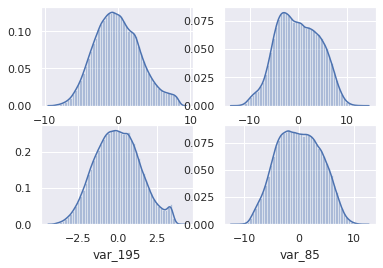

In [14]:
f, axes = plt.subplots(nrows = 2, ncols = 2)
for i in range(4):
    g = np.random.randint(0, 200)
    sns.distplot(a = data['var_'+str(g)].values - data['var_'+str(g)].values.mean(),ax = axes[i//2][i%2], axlabel = ('var_'+str(g)))
plt.show()

In [15]:
data

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,y
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,0
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,4.8121,8.6043,...,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149,0
199994,12.3925,-5.8821,11.2323,3.9237,10.4509,10.7262,7.0503,18.6968,-0.4976,6.0916,...,6.8687,3.7788,6.3378,14.4656,-1.4843,-3.9299,9.1164,16.3170,-7.5048,0
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661,0
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995,0


# **Machine Learning**

To trade off the imbalance I'll undersample the majority class and oversample the minority class (using SMOTE)

In [16]:
y = np.array(data['y'].values, dtype = int)
X = np.array(data.drop('y', axis = 1).values, dtype = float)

Scaling the values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

Using SMOTE to oversample target = 1 data points and then RandomUnderSampling the obtained data such that the ratio of target = 1/ target = 0 data points is 1/2

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE(sampling_strategy = 3/7, k_neighbors = 5, random_state = 9)
under = RandomUnderSampler(sampling_strategy = 0.5)
X1, y = smote.fit_resample(X1, y)
X1, y = under.fit_resample(X1, y)

In [19]:
print('1\t', len(y[y==1])/len(y), '% \n0\t', len(y[y==0])/len(y), '%')

1	 0.3333333333333333 % 
0	 0.6666666666666666 %


Split the data into train and validation

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size = 0.2)

First applying Logistic Regression(LR). LR will form the base algorithm and every other algorithm's performace will be compared to it.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'C' : [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]}
clf = GridSearchCV(LogisticRegression(), params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005,
                               0.01, 0.03, 0.05, 0.1, 0.3, 0.5]})

In [22]:
(clf.score(X_val, y_val))

0.8088264251255292

In [23]:
pred_prob = clf.predict_proba(X_val)

In a Classification problem accuracy is not a good measure of performance. Thus using AUC-ROC to compare the performance.

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def auc_roc_plot(x, y, l, colors):
    #roc curve for clf
    fpr, tpr, thresh = roc_curve(y_val, pred_prob[:, 1], pos_label = 1)

    # for fpr = tpr
    random_probs = [0 for i in range(len(y_val))]
    p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

    #auc
    auc_score = roc_auc_score(y_val, pred_prob[:, 1])

    #plot
    plt.plot(fpr, tpr, linestyle = '--', color = 'orange', label = "LogisticRegression")
    for i in range(len(x)):
        plt.plot(x[i], y[i], linestyle = '--', color = colors[i], label = l[i])
    plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = 'best')
    plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
fprs = []
tprs = []
labels = []
colors = []

Applying RandomForestClassifier

In [27]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
clf_rf_pp = clf_rf.predict_proba(X_val)
clf_rf_fpr, clf_rf_tpr, _ = roc_curve(y_val, clf_rf_pp[:, 1], pos_label = 1)
fprs.append(clf_rf_fpr)
tprs.append(clf_rf_tpr)
labels.append('Random Forest')
colors.append('r')

Applying DecisionTreeClassifier

In [28]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
clf_dt_pp = clf_dt.predict_proba(X_val)
clf_dt_fpr, clf_dt_tpr, _ = roc_curve(y_val, clf_dt_pp[:, 1], pos_label = 1)
fprs.append(clf_dt_fpr)
tprs.append(clf_dt_tpr)
labels.append('Decision Tree')
colors.append('c')

Applying XGBoost Classifier

In [29]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
clf_xgb_pp = clf_xgb.predict_proba(X_val)
clf_xgb_fpr, clf_xgb_tpr, _ = roc_curve(y_val, clf_xgb_pp[:, 1], pos_label = 1)
fprs.append(clf_xgb_fpr)
tprs.append(clf_xgb_tpr)
labels.append('XGB')
colors.append('m')

Visualising the AUC-ROC plots

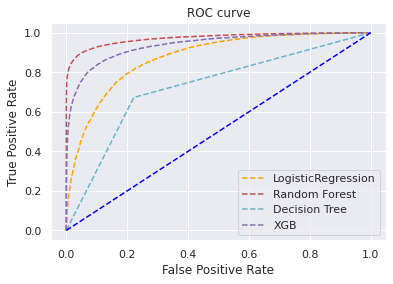

In [30]:
auc_roc_plot(fprs, tprs, labels, colors)

It is evident that the RandomForestClassifier does a good job followed by XGBClassifier then LogisticRegression (which was the baseline for comparison)

In [31]:
clf_rf.score(X_val, y_val)

0.8941862754750418

## Submission - ATTEMPT 1

* Using RandomForestClassifier, for test data 99.9% values were predicted to be 0.
* Upon submission the score obtained was 0.5 (out of 1)

## Applying Deep Learning

In [41]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(256, activation = 'relu', input_dim = X_train.shape[1]),
           Dense(256, activation = 'relu'),
           Dense(512, activation = 'relu'),
           Dense(512, activation = 'relu'),
           Dense(1024, activation = 'relu'),
           Dense(1024, activation = 'relu'),
           Dense(1024, activation = 'relu'),
           Dense(1024, activation = 'relu'),
           Dense(512, activation = 'relu'),
           Dense(512, activation = 'relu'),
           Dense(256, activation = 'relu'),
           Dense(256, activation = 'relu'),
           Dense(1, activation = 'sigmoid')
            ]
          )
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics = 'AUC')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               51456     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1

In [43]:
model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_val))

Epoch 1/20
5079/5079 [==============================] - 26s 5ms/step - loss: 0.3600 - auc: 0.9054 - val_loss: 0.3128 - val_auc: 0.9289
Epoch 2/20
5079/5079 [==============================] - 25s 5ms/step - loss: 0.2770 - auc: 0.9426 - val_loss: 0.2901 - val_auc: 0.9415
Epoch 3/20
5079/5079 [==============================] - 27s 5ms/step - loss: 0.2314 - auc: 0.9596 - val_loss: 0.2830 - val_auc: 0.9486
Epoch 4/20
5079/5079 [==============================] - 26s 5ms/step - loss: 0.1930 - auc: 0.9717 - val_loss: 0.2622 - val_auc: 0.9505
Epoch 5/20
5079/5079 [==============================] - 27s 5ms/step - loss: 0.1584 - auc: 0.9809 - val_loss: 0.2707 - val_auc: 0.9548
Epoch 6/20
5079/5079 [==============================] - 26s 5ms/step - loss: 0.1326 - auc: 0.9865 - val_loss: 0.5240 - val_auc: 0.9571
Epoch 7/20
5079/5079 [==============================] - 27s 5ms/step - loss: 0.2728 - auc: 0.9905 - val_loss: 0.2763 - val_auc: 0.9582
Epoch 8/20
5079/5079 [==============================] -

# Submission - ATTEMPT 2

* Using Deep Learning, upon submission the score obtained was 0.65